<a href="https://colab.research.google.com/github/OussBenO/OussBenO/blob/main/HeartDeseaseClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heart-disease-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4755824%2F8062170%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240506%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240506T021930Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8949af04c71ef87a3f4ebbe14953dd2155e1ad84cf8b03c563085393b5db93a5da06f55ab93da2c12a7338865de47aee973a74b189abf586985469ec702f1d985f8dd812ef4f47d834034189b4959d22c08e532ab0cb66121ef86f0fd3304743562915a98ba36d3632490e02da65497bdf2666304b82d35e36e54875595b496c9b846662aa6ca6a0441c85faa5801ce171ca99c7202ce80daf4ce3248d82539728ed387ddff94191c998390b2913b1bb9455a491d27387bae982ddbe46325a18a6d8bd1f49a6f6a756026c6b818b2bba13603cacc54ad5964b47928903bb2b3e474beb9e60c8ec55557e3903d30340cf593bd0fed5cc3d10090feeaab980a1bb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 408466 bytes downloaded
Downloaded and uncompressed: heart-disease-dataset
Data source import complete.


<a id='import'></a>

# 2. Import Libraries and Read the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')

 <a id='ida'></a>

# 3. Initial Data Exploration

In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [ ]:
df.shape

(1190, 12)

In [ ]:
df['target'].value_counts(normalize=True)

target
1    0.528571
0    0.471429
Name: proportion, dtype: float64

**Initial observations:**
- The dataset look clean.
- All values are numerical and non-null.
- Target column is quite well-balanced.
- The distribution of all columns looks well balanced. Only 'cholesterol' and 'oldpeak' might have skewed distribution with long right tails. We will verify it using visulizations.

<a id='eda'></a>

# 4. Exploratory Data Analysis  

<a id='dcv'></a>
## <font color='#106969'> 4.1 Distribution of Continuous Variables

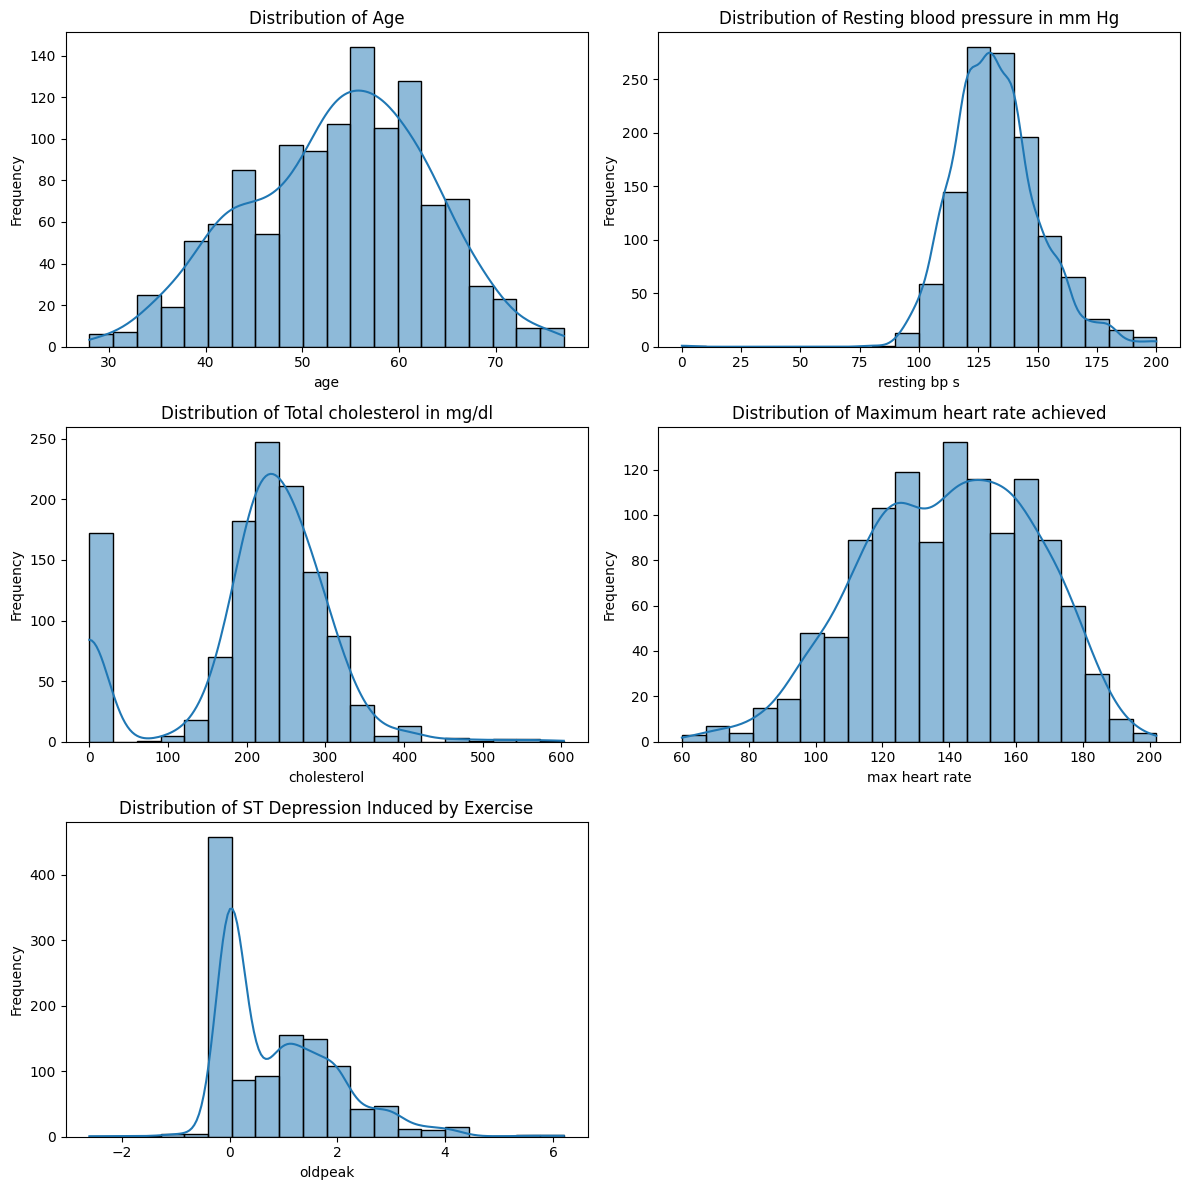

In [ ]:
# Select columns and write labels
num_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
labels = ['Age', 'Resting blood pressure in mm Hg', 'Total cholesterol in mg/dl', 'Maximum heart rate achieved', 'ST Depression Induced by Exercise']

# Set up the plot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution using histplot
for i, (column, label) in enumerate(zip(num_columns, labels)):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {label}')

# Turn off the last axis
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

#### Observations:
- Here, we can spot few problems. Column 'Cholesterol' has a high amount of zeros, which is impossible.
- Resting blood pressure of a person can never be 0, but our data have few zeros.
- And 'Oldpeak' has a lot zero values, but ST depression can be 0 mV, and is the standard criterion for an abnormal response. The problem that it has negative values.

<a id='dnv'></a>
## <font color='#106969'> 4.2 Distribution of Nominal Variables

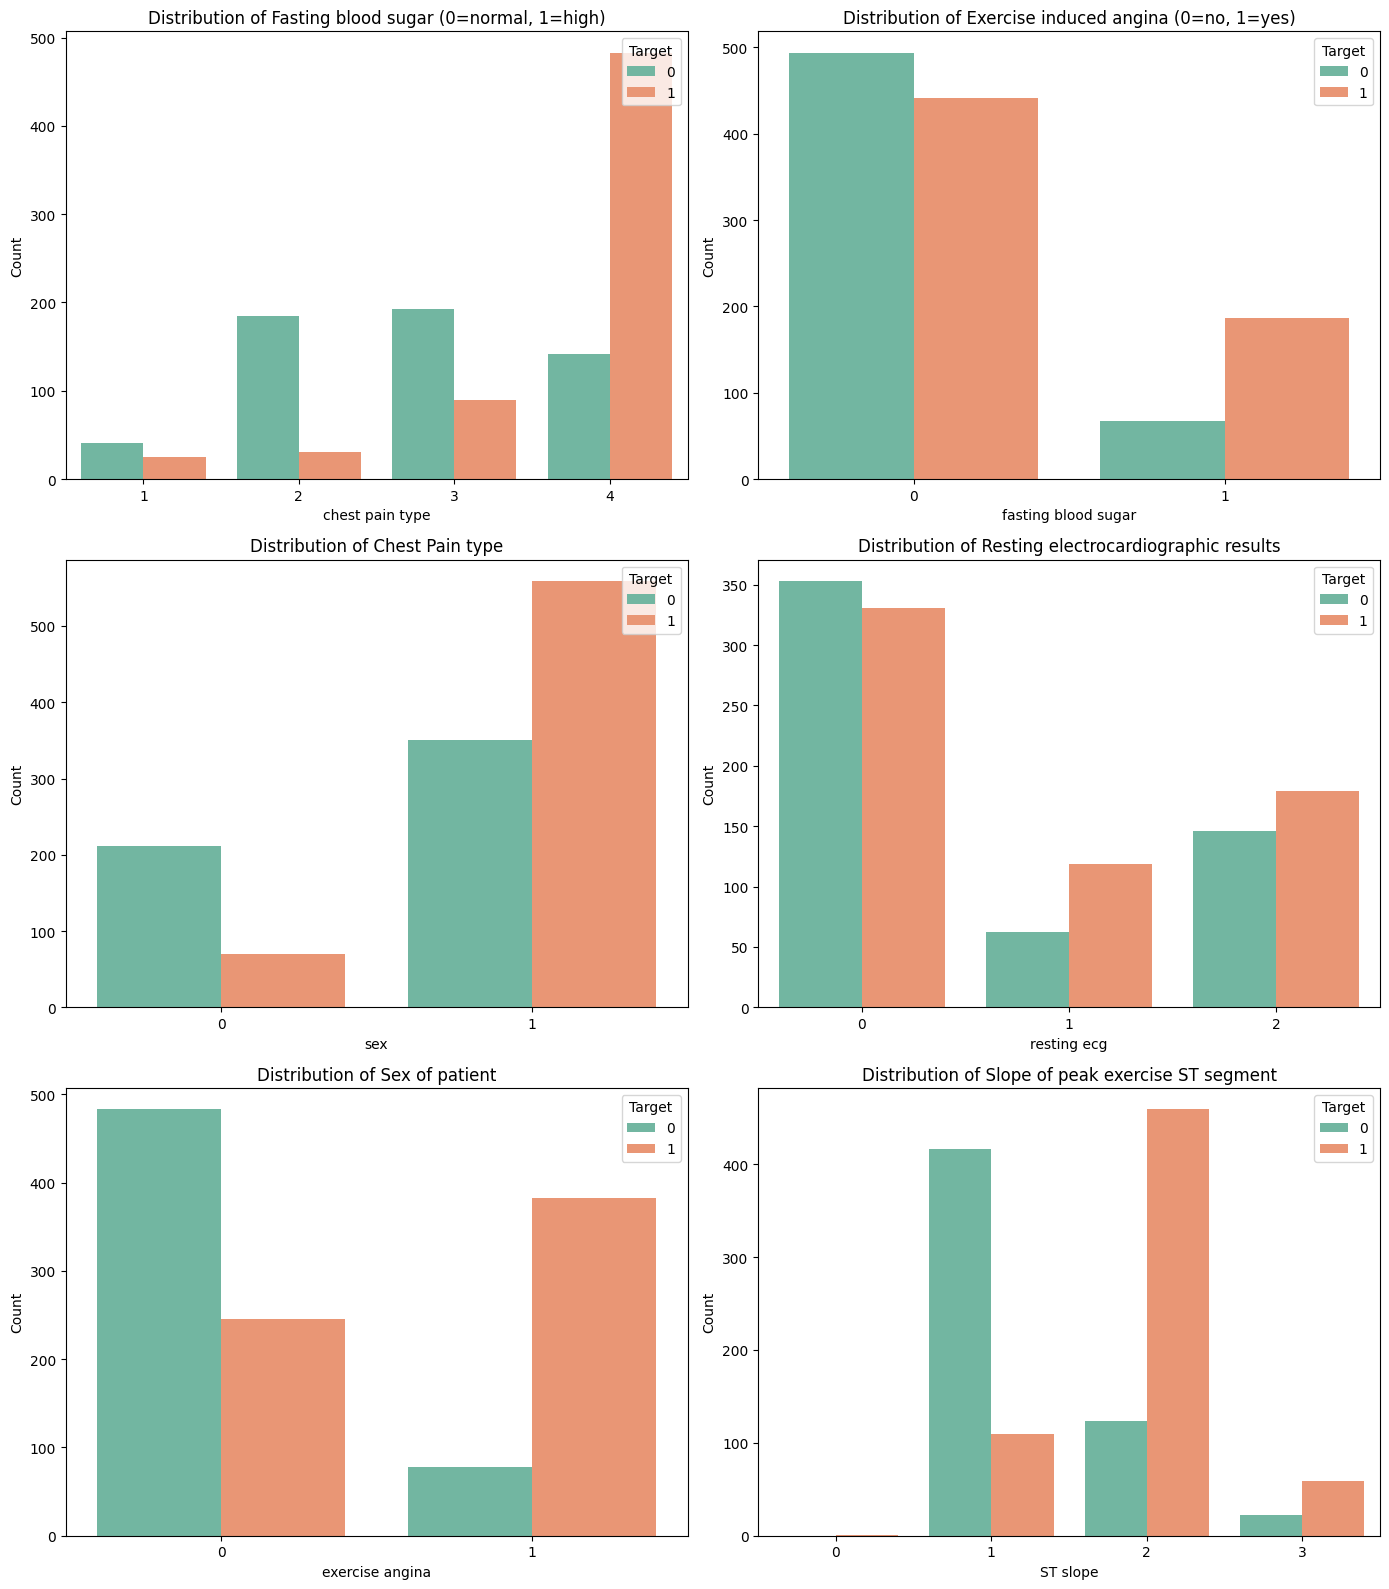

In [ ]:
# Select columns and write labels
nominal_columns = list(set(df.columns) - set(num_columns))
nominal_columns.remove('target')
labels = ['Fasting blood sugar (0=normal, 1=high)', 'Exercise induced angina (0=no, 1=yes)',  'Chest Pain type',
          'Resting electrocardiographic results', 'Sex of patient', 'Slope of peak exercise ST segment']

# Set up the plot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution using countplot
for i, (column, label) in enumerate(zip(nominal_columns, labels)):
    sns.countplot(data=df, x=column, hue='target', ax=axes[i], palette='Set2')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target', loc='upper right')
    axes[i].set_title(f'Distribution of {label}')

# Adjust layout
plt.tight_layout()
plt.show()

<a id='corr'></a>
## <font color='#106969'> 4.3 Correlation Between Variables

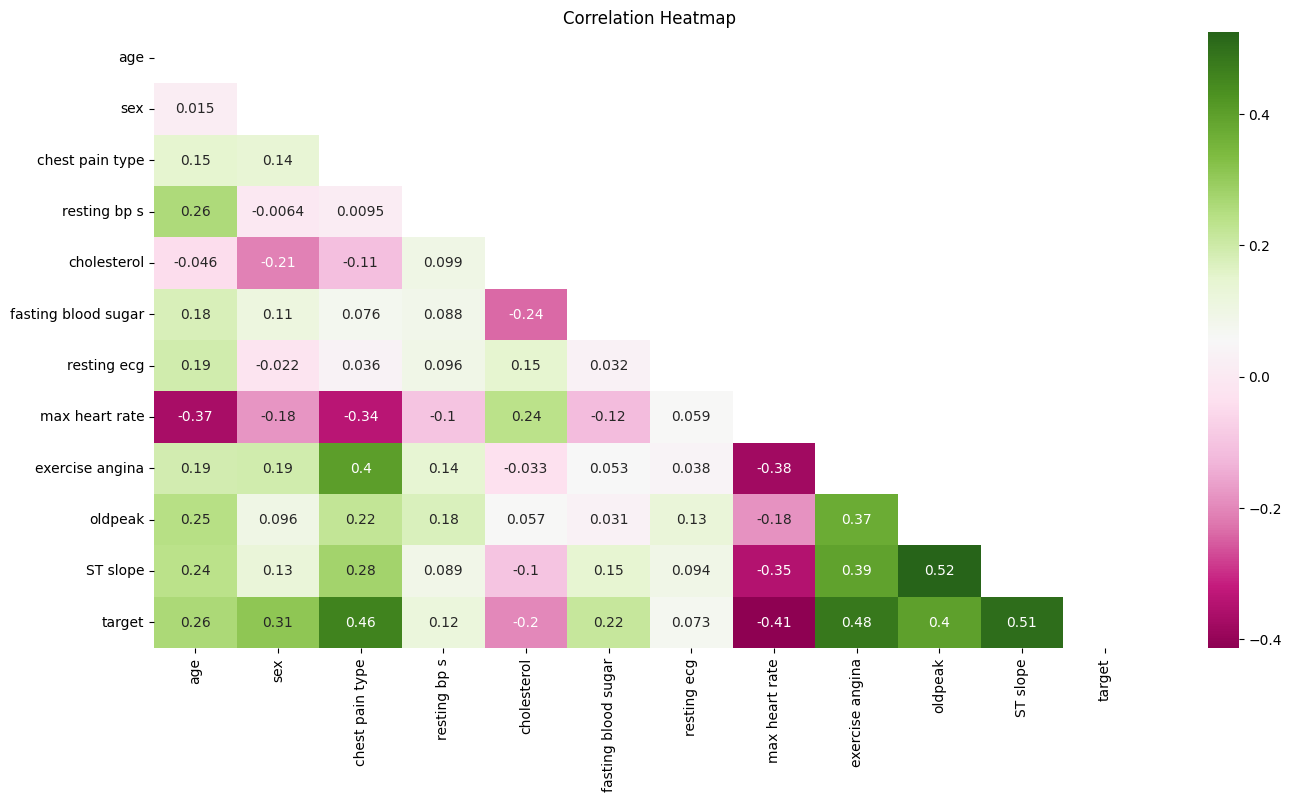

In [ ]:
plt.figure(figsize=(16, 8))

# Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with annotations
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, mask=mask)

# Set title for the plot
plt.title('Correlation Heatmap')

plt.show()

- **Chest pain and target**: Here is observed positive correlation, which makes sense: higher pain means higher risk to develop heart disease.
- **Target**: Positively correlated with ST slope, oldpeak, and exercise angina, indicating their association with heart disease.
- **Max Heart Rate**: Exhibits negative correlation with most columns, suggesting an inverse relationship with other variables.
- **Resting ECG, Resting BP S, Fasting Blood Sugar, Cholesterol**: Show low correlation with all columns, implying weaker associations with the target variable and other features.
- **Oldpeak and ST Slope**: Display the highest positive correlation (0.52), suggesting a moderate to strong relationship between these two variables.

<a id='clean'></a>

# 5. Data Cleaning

<a id='chol'></a>
## <font color='#106969'> 5.1 Exploring Rows with False Cholesterol

#### First, let's look at the percentage of rows with cholesterol equal to 0.

In [ ]:
round(sum(df['cholesterol'] == 0) / len(df) * 100, 1)

14.5

#### Find how the target variable is distributed among individuals with a cholesterol value of 0.

In [ ]:
# In real numbers
df[df['cholesterol'] == 0]['target'].value_counts()

target
1    152
0     20
Name: count, dtype: int64

In [ ]:
# In proportion
df[df['cholesterol'] == 0]['target'].value_counts(normalize=True)

target
1    0.883721
0    0.116279
Name: proportion, dtype: float64

While having a well-balanced `target` column overall, here, among individuals with cholesterol value of 0, `88.4%` have heart disease

#### Replacing zero values with avarage.

Let's replace zeros with mean of cholesterol values for non-zero rows.

In [ ]:
df_no_zero_chol  = df[df.cholesterol != 0]
df_no_zero_chol['cholesterol'].describe()

count    1018.000000
mean      245.906680
std        57.244599
min        85.000000
25%       209.000000
50%       240.000000
75%       276.000000
max       603.000000
Name: cholesterol, dtype: float64

In [ ]:
df['cholesterol'].replace(0, 240, inplace=True)

<a id='bp'></a>
## <font color='#106969'> 5.2 Exploring Rows with False Resting Blood Pressure

#### First, let's look at the percentage of such rows.

In [ ]:
round(sum(df['resting bp s'] == 0) / len(df) * 100, 3)

0.084

In [ ]:
df[df['resting bp s'] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,240,0,0,155,0,1.5,2,1


There is just one row, let's replace zero blood pressure with an average of the column.

In [ ]:
df['resting bp s'].describe()

count    1190.000000
mean      132.153782
std        18.368823
min         0.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: resting bp s, dtype: float64

In [ ]:
df['resting bp s'].replace(0, 130, inplace=True)

<a id='op'></a>
## <font color='#106969'> 5.3 Exploring Rows with Negative Oldpeak

#### Percentage.

In [ ]:
round(sum(df['oldpeak'] < 0) / len(df) * 100, 1)

1.1

1.1% of rows have oldpeak less than 0. We will replace them with the average.

In [ ]:
df['oldpeak'].describe()

count    1190.000000
mean        0.922773
std         1.086337
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64

In [ ]:
df[df < 0] = 0.6

<a id='ml'></a>

# 6. Machine Learning Modeling  

<a id='split'></a>
## <font color='#106969'> 6.1 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Set a variable X to the features of the dataframe and y to the target column.
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<a id='rfc'></a>
## <font color='#106969'> 6.2 Random Forest Classifier

We will:

- Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.
- Plot the resulting out-of-bag errors as a function of the number of trees.

<code>max_features </code>   $m$ the number of features to consider when looking for the best split.

If we have M features, a popular method to determine m is to use the square root of M:

$m= floor(\sqrt{M}) $

In [ ]:
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1,
                            max_features=max_features)

oob_list = list()

# Iterate through all of the possibilities for
# number of trees
for n_trees in [15, 30, 50, 100, 150, 200, 300, 400, 500, 600]:

    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_

    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.124850
30.0,0.103241
50.0,0.098439
100.0,0.096038
150.0,0.088836
200.0,0.093637
300.0,0.090036
400.0,0.088836
500.0,0.090036


The out-of-bag error looks like stabilized around 150 trees.

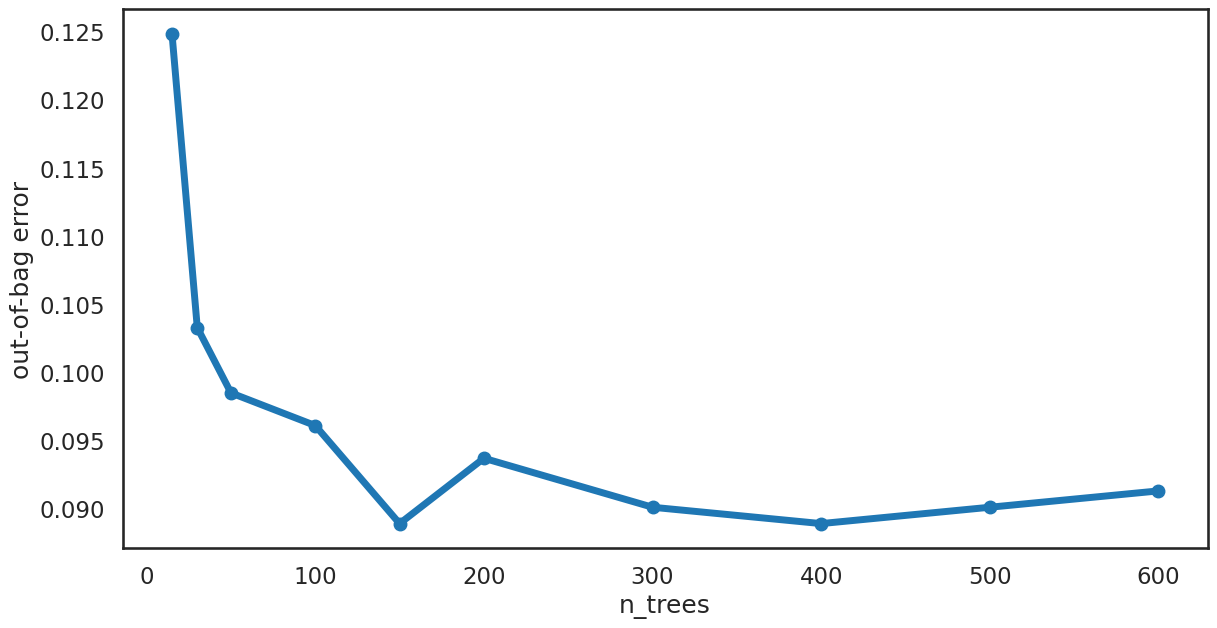

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

<a id='etc'></a>
## <font color='#106969'> 6.3 Extra Trees Classifier

Now we will:

*   Repeat the process but this time using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.
*   Compare the out-of-bag errors for the two different types of models.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True,
                          random_state=42,
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for
# number of trees
for n_trees in [15, 30, 50, 100, 150, 200, 300, 400, 500, 600]:

    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.129652
30.0,0.111645
50.0,0.097239
100.0,0.096038
150.0,0.094838
200.0,0.093637
300.0,0.096038
400.0,0.088836
500.0,0.087635


 Combine the two dataframes into a single one for easier plotting.

In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.124850,0.129652
30.0,0.103241,0.111645
50.0,0.098439,0.097239
100.0,0.096038,0.096038
150.0,0.088836,0.094838
200.0,0.093637,0.093637
300.0,0.090036,0.096038
400.0,0.088836,0.088836
500.0,0.090036,0.087635


Both models perform similarly, but looks like the lowest error was achieved with ExtraTrees at 500 number of trees:


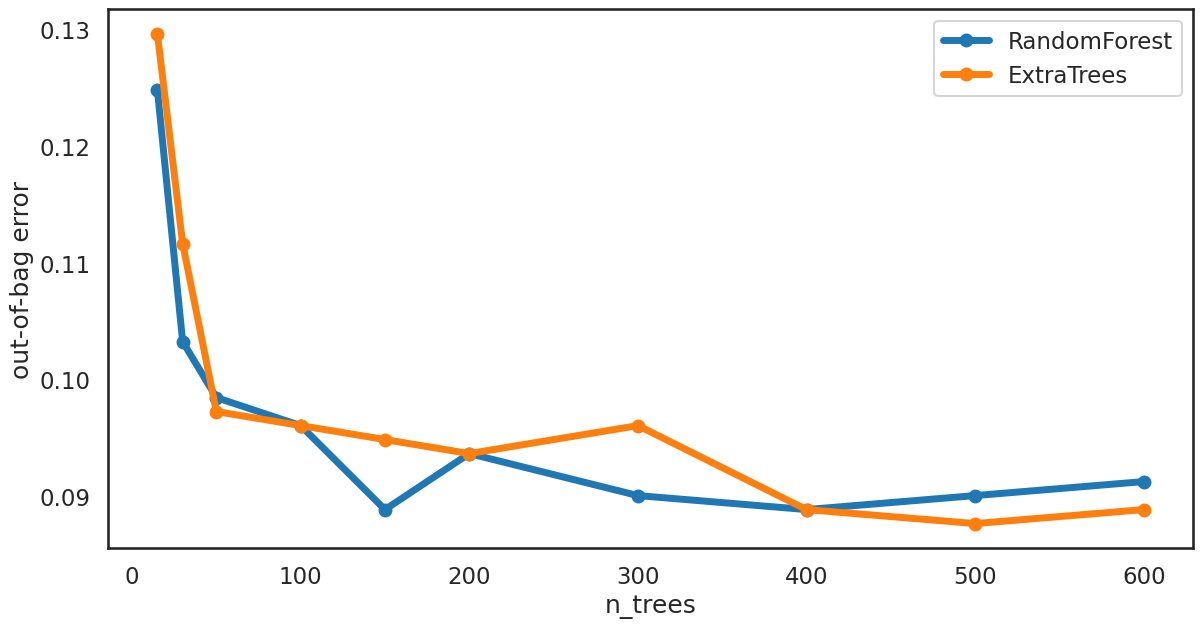

In [ ]:
ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

<a id='results'></a>
## <font color='#106969'> 6.4 Gathering Results

Here, we will:

*   Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set.
*   Given the distribution of the predicted class, which metric is most important? Which could be deceiving?

### Chosen model : Extra Trees with 500 estimators

In [ ]:
model = EF.set_params(n_estimators=500)

y_pred = model.predict(X_test)

<a id='report'></a>
### <font color='#4e0e2e'> 6.4.1 Classification Report

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       185
           1       0.92      0.96      0.94       172

    accuracy                           0.94       357
   macro avg       0.94      0.94      0.94       357
weighted avg       0.94      0.94      0.94       357



While achieving an impressive accuracy and F1-score of 0.94, it's essential to note **the exceptional recall rate of 0.96 for individuals with the disease**. This indicates the model's proficiency in identifying positive cases, prioritizing sensitivity over precision. However, this prioritization may lead to a slightly lower precision, potentially misclassifying some individuals as having the disease when they do not. In critical domains such as medical diagnoses, where detecting true positive cases is paramount, prioritizing recall ensures minimal missed diagnoses.

<a id='matrix'></a>
### <font color='#4e0e2e'> 6.4.2 Confusion Matrix

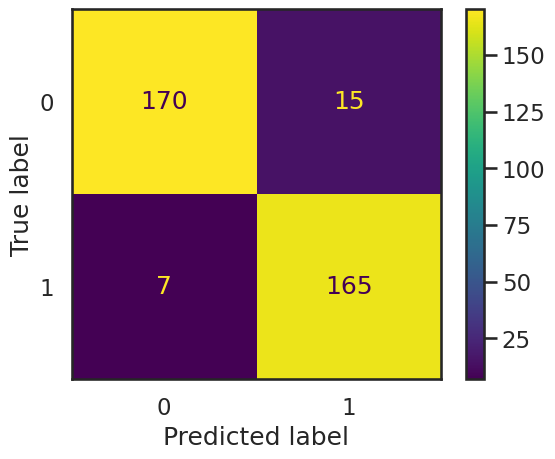

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix,ConfusionMatrixDisplay

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

<div class="alert alert-block alert-success">  
We see that only 7 positive and 15 negative cases were misclassified (out 357).
</div>

<a id='fi'></a>
### <font color='#4e0e2e'> 6.4.3 Bonus: Feature Importances

Now, let's look into the importance of features.  

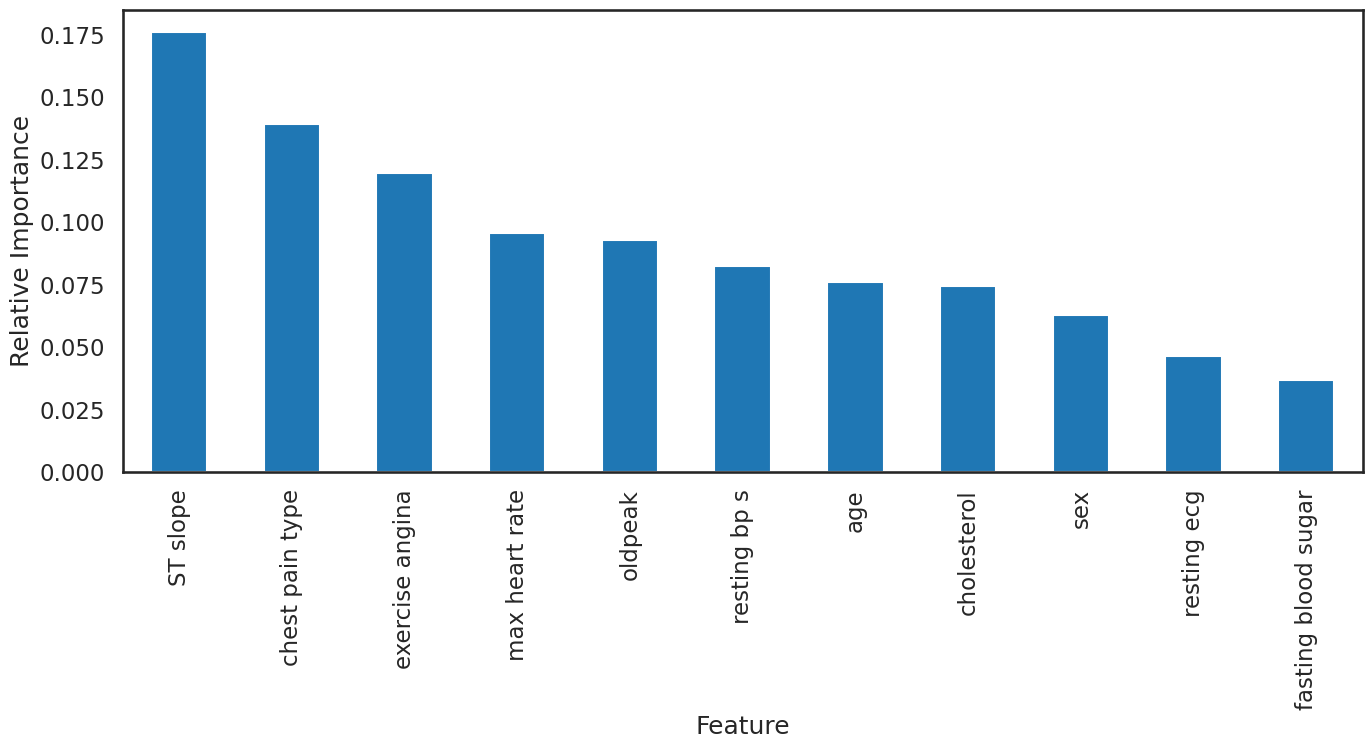

In [ ]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16,6))
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Feature')
plt.show()

It appears that we lack a single dominant predictor for the presence of heart disease. The significance levels of all features fall within the range of 0.05 to 0.175, with St Slope, chest pain type, and exercise angina ranking highest on the list.

In [ ]:
CREDITS : ME - ANNA BALATSKA